In [93]:
# 由于要实现的模型涉及到比较复杂的数据处理和分析，我们将从简单的数据探索开始，
# 然后尝试定义并计算动量指标，最后进行简单的可视化展示。
# 本例将重点放在如何根据比赛分数计算动量，并不会构建一个完整的状态空间模型。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [94]:
# 改进势头计算函数以包括赢得的局数和盘数，以及更精确的发球优势计算
def calculate_momentum_improved_1(df, index, window_size=3):
    start_index = max(index - window_size, 0)
    end_index = min(index + window_size + 1, len(df))
    time_window_df = df.iloc[start_index:end_index]

    # 初始化势头值
    p1_momentum = 0
    p2_momentum = 0

    # 赢得的局数和盘数
    p1_sets_won = time_window_df['p1_sets'].iloc[-1] - time_window_df['p1_sets'].iloc[0]
    p2_sets_won = time_window_df['p2_sets'].iloc[-1] - time_window_df['p2_sets'].iloc[0]
    p1_games_won = time_window_df['p1_games'].iloc[-1] - time_window_df['p1_games'].iloc[0]
    p2_games_won = time_window_df['p2_games'].iloc[-1] - time_window_df['p2_games'].iloc[0]

    # 发球优势
    # 假设发球方在每个得分上的额外权重为0.175
    serve_advantage_weight = 0.175
    p1_serve_advantage = (time_window_df[time_window_df['server'] == 1]['point_victor'] == 1).sum() * serve_advantage_weight
    p2_serve_advantage = (time_window_df[time_window_df['server'] == 2]['point_victor'] == 2).sum() * serve_advantage_weight

     # 其他因素（得分优势、双误、破发点、非受迫性失误、制胜分、ACE）
    p1_points_advantage = (time_window_df['point_victor'].apply(lambda x: x == 1).sum() - time_window_df['point_victor'].apply(lambda x: x == 2).sum())
    p2_points_advantage = -p1_points_advantage 
    p1_double_fault=-time_window_df['p1_double_fault'].sum()
    p2_double_fault=-time_window_df['p2_double_fault'].sum()
    p1_break_points_won = time_window_df['p1_break_pt_won'].sum()
    p2_break_points_won = time_window_df['p2_break_pt_won'].sum()
    p1_unforced_errors = -time_window_df['p1_unf_err'].sum()
    p2_unforced_errors = -time_window_df['p2_unf_err'].sum()
    p1_winners = time_window_df['p1_winner'].sum()
    p2_winners = time_window_df['p2_winner'].sum()
    p1_ace=time_window_df['p1_ace'].sum()
    p2_ace=time_window_df['p2_ace'].sum()

    # 合并计算势头
    p1_momentum = p1_points_advantage + p1_serve_advantage + p1_break_points_won + p1_unforced_errors + p1_winners + p1_sets_won + p1_games_won
    #p2_momentum = p2_points_advantage + p2_serve_advantage + p2_break_points_won + p2_unforced_errors + p2_winners + p2_sets_won + p2_games_won

    return p1_points_advantage, p1_serve_advantage, p1_break_points_won, p1_unforced_errors, p1_winners , p1_sets_won, p1_games_won,p1_ace,p1_double_fault








# 改进势头计算函数以包括赢得的局数和盘数，以及更精确的发球优势计算
def calculate_momentum_improved_2(df, index, window_size=3):
    start_index = max(index - window_size, 0)
    end_index = min(index + window_size + 1, len(df))
    time_window_df = df.iloc[start_index:end_index]

    # 初始化势头值
    p1_momentum = 0
    p2_momentum = 0

    # 赢得的局数和盘数
    p1_sets_won = time_window_df['p1_sets'].iloc[-1] - time_window_df['p1_sets'].iloc[0]
    p2_sets_won = time_window_df['p2_sets'].iloc[-1] - time_window_df['p2_sets'].iloc[0]
    p1_games_won = time_window_df['p1_games'].iloc[-1] - time_window_df['p1_games'].iloc[0]
    p2_games_won = time_window_df['p2_games'].iloc[-1] - time_window_df['p2_games'].iloc[0]

    # 发球优势
    # 假设发球方在每个得分上的额外权重为0.175
    serve_advantage_weight = 0.175
    p1_serve_advantage = (time_window_df[time_window_df['server'] == 1]['point_victor'] == 1).sum() * serve_advantage_weight
    p2_serve_advantage = (time_window_df[time_window_df['server'] == 2]['point_victor'] == 2).sum() * serve_advantage_weight

     # 其他因素（得分优势、双误、破发点、非受迫性失误、制胜分、ACE）
    p1_points_advantage = (time_window_df['point_victor'].apply(lambda x: x == 1).sum() - time_window_df['point_victor'].apply(lambda x: x == 2).sum())
    p2_points_advantage = -p1_points_advantage 
    p1_double_fault=-time_window_df['p1_double_fault'].sum()
    p2_double_fault=-time_window_df['p2_double_fault'].sum()
    p1_break_points_won = time_window_df['p1_break_pt_won'].sum()
    p2_break_points_won = time_window_df['p2_break_pt_won'].sum()
    p1_unforced_errors = -time_window_df['p1_unf_err'].sum()
    p2_unforced_errors = -time_window_df['p2_unf_err'].sum()
    p1_winners = time_window_df['p1_winner'].sum()
    p2_winners = time_window_df['p2_winner'].sum()
    p1_ace=time_window_df['p1_ace'].sum()
    p2_ace=time_window_df['p2_ace'].sum()


    return p2_points_advantage, p2_serve_advantage, p2_break_points_won, p2_unforced_errors, p2_winners , p2_sets_won, p2_games_won , p2_ace , p2_double_fault






def cumsum_detection(series):
    """
    CUMSUM检测算法实现，用于检测序列中的转折点。
    :param series: 一维数据序列 (Pandas Series)
    :return: 转折点的索引列表
    """
    # 计算差分序列
    diff_series = series.diff().fillna(0)  # 用0填充NaN值
    
    # 计算累积和
    cumsum_series = diff_series.cumsum()
    
    # 识别转折点：当累积和重新穿过零点时，认为是一个转折点
    turning_points = []
    for i in range(1, len(cumsum_series)):
        # 如果累积和的符号与前一个不同，则认为是转折点
        if cumsum_series[i] * cumsum_series[i-1] < 0:
            turning_points.append(i)
    
    return turning_points
import numpy as np

def entropy_weight_method(data):
    """
    熵权法计算各指标的权重
    :param data: DataFrame, 各指标的数据
    :return: 权重数组
    """
    # 数据标准化处理
    data_normalized = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    
    # 计算每个指标的熵值
    epsilon = 1e-12  # 避免log(0)
    p_matrix = data_normalized / data_normalized.sum()
    e_matrix = -np.sum(p_matrix * np.log(p_matrix + epsilon), axis=0) / np.log(len(data))
    
    # 计算每个指标的差异系数
    d_matrix = 1 - e_matrix
    
    # 计算权重
    weights = d_matrix / d_matrix.sum()
    
    return weights


In [95]:
# 读取数据
df = pd.read_csv('Wimbledon_featured_matches.csv')

In [96]:


# 选择一场特定的比赛进行分析，根据题目描述选择2023年温布尔登决赛
# 假设决赛的match_id为"2023-wimbledon-1701"

dddd=pd.DataFrame()
for match_id in df['match_id'].unique():
#     match_id = "2023-wimbledon-1701"
    match_data = df[df['match_id'] == match_id].copy()
    match_data.reset_index(inplace=True,drop=True)
    # 对数据集中的每一行应用计算势头的函数
    momentum_values1 = [calculate_momentum_improved_1(match_data, index) for index in range(len(match_data))]
    
    player1_data=pd.DataFrame(momentum_values1,columns=['p1_points_advantage','p1_serve_advantage',
                                     'p1_break_points_won','p1_unforced_errors',
                                     'p1_winners','p1_sets_won',
                                     'p1_games_won','p1_ace','p1_double_fault'])
    momentum_values2 = [calculate_momentum_improved_2(match_data, index) for index in range(len(match_data))]
    player2_data=pd.DataFrame(momentum_values2,columns=['p2_points_advantage','p2_serve_advantage',
                                     'p2_break_points_won','p2_unforced_errors',
                                     'p2_winners','p2_sets_won',
                                     'p2_games_won','p2_ace','p2_double_fault'])
        # 计算球员1和球员2的指标权重
    weights_p1 = entropy_weight_method(player1_data)
    weights_p2 = entropy_weight_method(player2_data)

    # 计算加权后的综合得分
    player1_score = (player1_data * weights_p1).sum(axis=1)
    player2_score = (player2_data * weights_p2).sum(axis=1)
    # 将计算得到的势头值分配回原始数据集
    match_data['p1_momentum']=pd.DataFrame(player1_score)
    match_data['p2_momentum']=pd.DataFrame(player2_score)

    dddd=pd.concat([dddd,match_data],axis=0)

In [97]:
dddd=pd.DataFrame(dddd)

In [98]:
temp=dddd[(dddd['player1']=='Carlos Alcaraz')&(dddd['player2']=='Nicolas Jarry')]
temp

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,p1_momentum,p2_momentum
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,6.000,7.840,2,95.0,BC,NCTL,ND,0.051707,0.000000
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,5.253,7.094,1,118.0,B,CTL,ND,0.315046,-0.006915
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,13.800,19.808,4,120.0,B,NCTL,D,0.308291,0.000000
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,51.108,75.631,13,130.0,BW,CTL,D,0.571629,-0.006915
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0.649,0.813,1,112.0,W,NCTL,NaN,0.581955,0.036536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,03:53:25,4,12,296,2,1,6,...,0,10.044,9.281,2,130.0,BW,NCTL,ND,0.079270,0.036536
296,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,03:54:01,4,12,297,2,1,6,...,0,52.318,58.723,14,113.0,BW,NCTL,ND,0.108346,0.022705
297,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,03:55:02,4,12,298,2,1,6,...,1,2.056,1.509,1,129.0,B,NCTL,ND,0.096350,0.029621
298,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,03:55:34,4,12,299,2,1,6,...,0,12.292,32.582,1,128.0,C,NCTL,ND,0.022478,0.036536


In [99]:
temp.isnull().sum()

match_id               0
player1                0
player2                0
elapsed_time           0
set_no                 0
game_no                0
point_no               0
p1_sets                0
p2_sets                0
p1_games               0
p2_games               0
p1_score               0
p2_score               0
server                 0
serve_no               0
point_victor           0
p1_points_won          0
p2_points_won          0
game_victor            0
set_victor             0
p1_ace                 0
p2_ace                 0
p1_winner              0
p2_winner              0
winner_shot_type       0
p1_double_fault        0
p2_double_fault        0
p1_unf_err             0
p2_unf_err             0
p1_net_pt              0
p2_net_pt              0
p1_net_pt_won          0
p2_net_pt_won          0
p1_break_pt            0
p2_break_pt            0
p1_break_pt_won        0
p2_break_pt_won        0
p1_break_pt_missed     0
p2_break_pt_missed     0
p1_distance_run        0


In [100]:
del temp['return_depth']

In [101]:
temp.reset_index(inplace=True,drop=True)

In [102]:
temp.fillna(method='backfill',inplace=True)
temp.isnull().sum()

match_id              0
player1               0
player2               0
elapsed_time          0
set_no                0
game_no               0
point_no              0
p1_sets               0
p2_sets               0
p1_games              0
p2_games              0
p1_score              0
p2_score              0
server                0
serve_no              0
point_victor          0
p1_points_won         0
p2_points_won         0
game_victor           0
set_victor            0
p1_ace                0
p2_ace                0
p1_winner             0
p2_winner             0
winner_shot_type      0
p1_double_fault       0
p2_double_fault       0
p1_unf_err            0
p2_unf_err            0
p1_net_pt             0
p2_net_pt             0
p1_net_pt_won         0
p2_net_pt_won         0
p1_break_pt           0
p2_break_pt           0
p1_break_pt_won       0
p2_break_pt_won       0
p1_break_pt_missed    0
p2_break_pt_missed    0
p1_distance_run       0
p2_distance_run       0
rally_count     

In [103]:
temp.dtypes


match_id               object
player1                object
player2                object
elapsed_time           object
set_no                  int64
game_no                 int64
point_no                int64
p1_sets                 int64
p2_sets                 int64
p1_games                int64
p2_games                int64
p1_score               object
p2_score               object
server                  int64
serve_no                int64
point_victor            int64
p1_points_won           int64
p2_points_won           int64
game_victor             int64
set_victor              int64
p1_ace                  int64
p2_ace                  int64
p1_winner               int64
p2_winner               int64
winner_shot_type       object
p1_double_fault         int64
p2_double_fault         int64
p1_unf_err              int64
p2_unf_err              int64
p1_net_pt               int64
p2_net_pt               int64
p1_net_pt_won           int64
p2_net_pt_won           int64
p1_break_p

In [104]:
temp['p1_score'].unique()

array(['0', '15', '30', '40', 'AD', '1', '2', '3', '4', '5', '6'],
      dtype=object)

这个术语是用于描述网球比赛中的得分情况的。具体解释如下：

- "p1_score" 表示球员1的得分，也就是一场比赛中球员1的当前得分情况。
- "0 (love)" 表示球员1的得分为0分，通常在比赛中称为"love"。
- "15" 表示球员1的得分为15分。
- "30" 表示球员1的得分为30分。
- "40" 表示球员1的得分为40分。
- "AD (advantage)" 表示球员1处于优势地位，通常用于描述在比赛中的一种特殊情况。如果比分达到40平，而球员1再次得分，他们将处于"优势"地位，需要再次得分才能赢得比赛。

这些术语通常用于网球比赛中，以记录和表示比赛的得分情况。在网球比赛中，通常需要达到40分才能赢得一局，但在一些情况下，需要赢得两个连续的得分才能获胜，这时会出现"AD"表示优势。

In [105]:
temp['winner_shot_type'].unique()

array(['0', 'F', 'B'], dtype=object)

In [106]:
temp['serve_width'].unique()

array(['BC', 'B', 'BW', 'W', 'C'], dtype=object)

In [107]:
temp['serve_depth'].unique()

array(['NCTL', 'CTL'], dtype=object)

In [108]:
temp1=pd.get_dummies(temp[['p1_score','p2_score','winner_shot_type','serve_width','serve_depth']])


temp2=temp[['set_no', 'game_no',
       'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games','server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace',
       'p1_winner', 'p2_winner', 'p1_double_fault',
       'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
       'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run',
       'rally_count', 'speed_mph', 'p1_momentum', 'p2_momentum']]


In [109]:
data=pd.concat([temp1,temp2],axis=1)
data

,p1_score_0,p1_score_1,p1_score_15,p1_score_2,p1_score_3,p1_score_30,p1_score_4,p1_score_40,p1_score_5,p1_score_6,...,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,p1_momentum,p2_momentum
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6.000,7.840,2,95.0,0.051707,0.000000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.253,7.094,1,118.0,0.315046,-0.006915
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,13.800,19.808,4,120.0,0.308291,0.000000
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,51.108,75.631,13,130.0,0.571629,-0.006915
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.649,0.813,1,112.0,0.581955,0.036536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,10.044,9.281,2,130.0,0.079270,0.036536
296,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,52.318,58.723,14,113.0,0.108346,0.022705
297,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,2.056,1.509,1,129.0,0.096350,0.029621
298,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,12.292,32.582,1,128.0,0.022478,0.036536


In [110]:
data.columns

Index(['p1_score_0', 'p1_score_1', 'p1_score_15', 'p1_score_2', 'p1_score_3',
       'p1_score_30', 'p1_score_4', 'p1_score_40', 'p1_score_5', 'p1_score_6',
       'p1_score_AD', 'p2_score_0', 'p2_score_1', 'p2_score_15', 'p2_score_2',
       'p2_score_3', 'p2_score_30', 'p2_score_4', 'p2_score_40', 'p2_score_5',
       'p2_score_6', 'p2_score_7', 'p2_score_AD', 'winner_shot_type_0',
       'winner_shot_type_B', 'winner_shot_type_F', 'serve_width_B',
       'serve_width_BC', 'serve_width_BW', 'serve_width_C', 'serve_width_W',
       'serve_depth_CTL', 'serve_depth_NCTL', 'set_no', 'game_no', 'point_no',
       'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'serve_no',
       'point_victor', 'p1_points_won', 'p2_points_won', 'game_victor',
       'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner',
       'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err',
       'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won',
       'p1_break_pt', 'p2_break_pt'

In [111]:
data['p1_momentum_diff1']=data['p1_momentum'].diff(1)

In [112]:
data=data.dropna()

In [113]:
data.reset_index(inplace=True,drop=True)

In [114]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc,precision_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
# 分离X和Y
X = data[['p1_score_0', 'p1_score_1', 'p1_score_15', 'p1_score_2', 'p1_score_3',
       'p1_score_30', 'p1_score_4', 'p1_score_40', 'p1_score_5', 'p1_score_6',
       'p1_score_AD', 'p2_score_0', 'p2_score_1', 'p2_score_15', 'p2_score_2',
       'p2_score_3', 'p2_score_30', 'p2_score_4', 'p2_score_40', 'p2_score_5',
       'p2_score_6', 'p2_score_7', 'p2_score_AD', 'winner_shot_type_0',
       'winner_shot_type_B', 'winner_shot_type_F', 'serve_width_B',
       'serve_width_BC', 'serve_width_BW', 'serve_width_C', 'serve_width_W',
       'serve_depth_CTL', 'serve_depth_NCTL', 'set_no', 'game_no', 'point_no',
       'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'serve_no',
       'point_victor', 'p1_points_won', 'p2_points_won', 'game_victor',
       'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner',
       'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err',
       'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won',
       'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won',
       'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run',
       'p2_distance_run', 'rally_count', 'speed_mph']]



Y = data['p1_momentum_diff1']


In [115]:
# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import xgboost as xgb

from sklearn.metrics import accuracy_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor


import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))


In [116]:
tr_x,te_x,tr_y,te_y=train_test_split(X ,Y,test_size=0.3,random_state=5)

神经网络:
训练集平均绝对百分比误差:1.011
测试集平均绝对百分比误差:1.000
平均绝对误差: 2.0940980964825617
r2_score -909.9854341042519


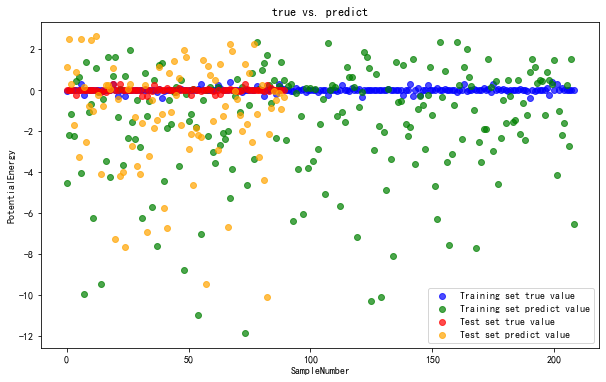


线性回归:
训练集平均绝对百分比误差:2.642
测试集平均绝对百分比误差:3.495
平均绝对误差: 0.08132726502443162
r2_score -0.3445966404155527


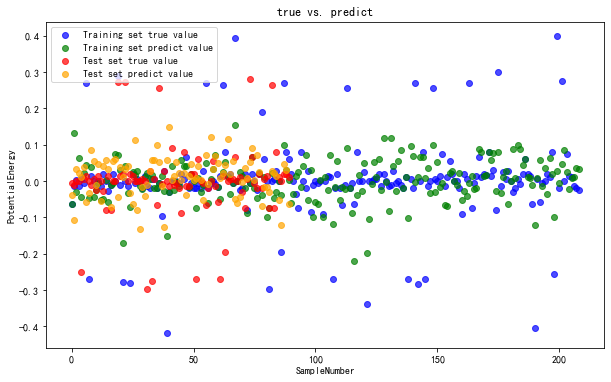


决策树回归:
训练集平均绝对百分比误差:nan
测试集平均绝对百分比误差:nan
平均绝对误差: 0.11425378966729988
r2_score -2.4488726138160297


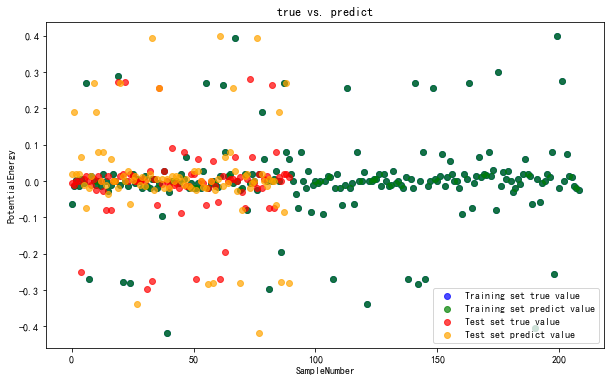


随机森林回归:
训练集平均绝对百分比误差:2.661
测试集平均绝对百分比误差:61.693
平均绝对误差: 0.07205870544222118
r2_score -0.2446876555190376


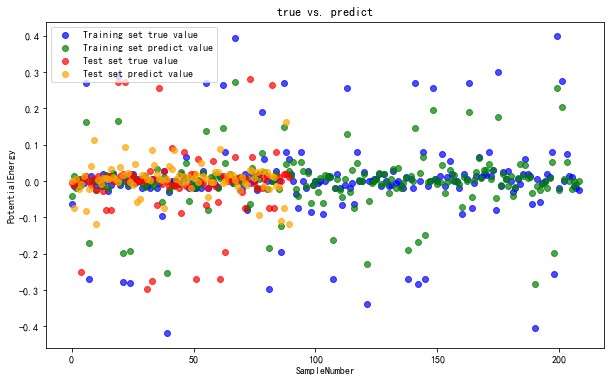


Adaboost回归:
训练集平均绝对百分比误差:1.370
测试集平均绝对百分比误差:1.953
平均绝对误差: 0.0993129449353635
r2_score -1.0017244900235371


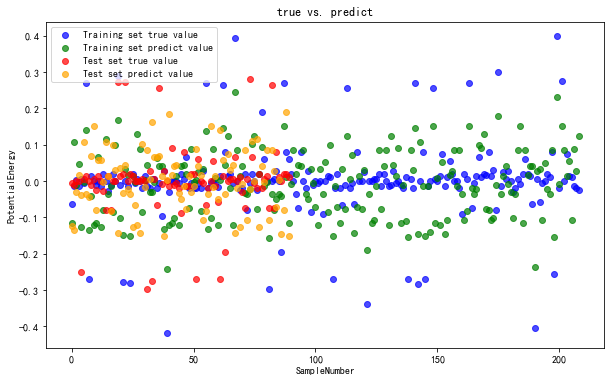


GBDT回归:
训练集平均绝对百分比误差:5.813
测试集平均绝对百分比误差:2.320
平均绝对误差: 0.037250409677575244
r2_score 0.6671925219597943


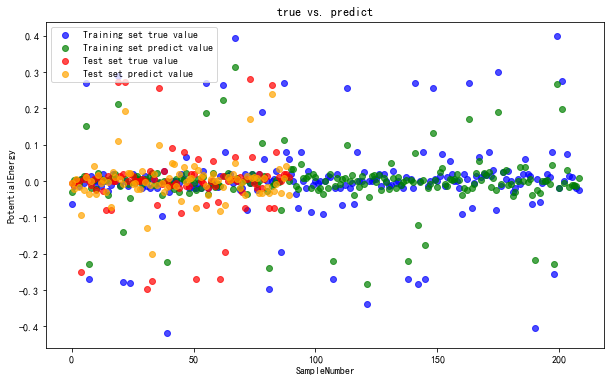


xgboost回归:
训练集平均绝对百分比误差:0.207
测试集平均绝对百分比误差:0.221
平均绝对误差: 0.0007552505136636524
r2_score 0.9998757333058157


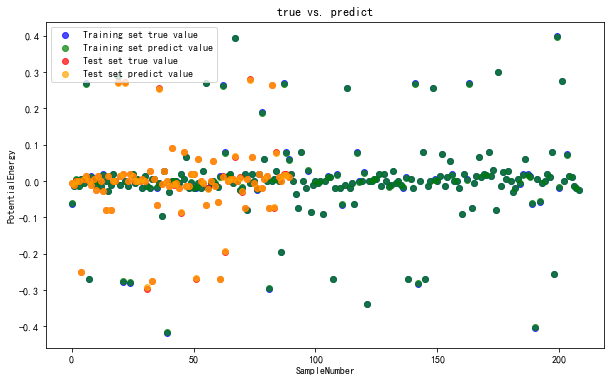

In [117]:




model=MLPRegressor(hidden_layer_sizes=10,max_iter=1000).fit(tr_x,tr_y)
y_pred=model.predict(te_x)

print("神经网络:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(model.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)


# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()



print("\n线性回归:")
logreg = LinearRegression()
logreg.fit(tr_x, tr_y)
y_pred = logreg.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))

# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = logreg.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = logreg.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)


# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

      
print("\n决策树回归:")
tree=DecisionTreeRegressor(max_depth=50,random_state=0)
tree.fit(tr_x,tr_y)
y_pred = tree.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))

# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = tree.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = tree.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)


# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()
      
      
print("\n随机森林回归:")
rf=RandomForestRegressor()
rf.fit(tr_x,tr_y)

y_pred = rf.predict(te_x)

print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))

# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = rf.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = rf.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)


# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()
      

# print("\nLGBM回归:")
# lgb_model=lgb.LGBMRegressor()
# lgb_model.fit(tr_x,tr_y)
# y_pred = lgb_model.predict(te_x)
# print("训练集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(tr_x),tr_y)))
# print("测试集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(te_x),te_y)))
# print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
# print("r2_score",r2_score(te_y,y_pred))

# # 真实值与拟合值的对比图
# plt.figure(figsize=(10, 6))

# # 训练集
# tr_y_pred = lgb_model.predict(tr_x)
# plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
# plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# # 测试集
# te_y_pred = lgb_model.predict(te_x)
# plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
# plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)


# # 为图添加标题和图例
# plt.title('真实值 vs. 预测值')
# plt.xlabel('样本序号')
# plt.ylabel('综合得分')
# plt.legend()
# # 显示图形
# plt.show()

print("\nAdaboost回归:")
# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(tr_x,tr_y)
y_pred = ada_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))

# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = ada_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = ada_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)


# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\nGBDT回归:")
# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
y_pred = gbdt_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))

# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = gbdt_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = gbdt_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)


# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, Y)

y_pred = xgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))

# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = xgb_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)


# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()



xgboost回归:
训练集平均绝对百分比误差:0.000
平均绝对误差: 0.007921816842082501
r2_score 0.9875719565189655


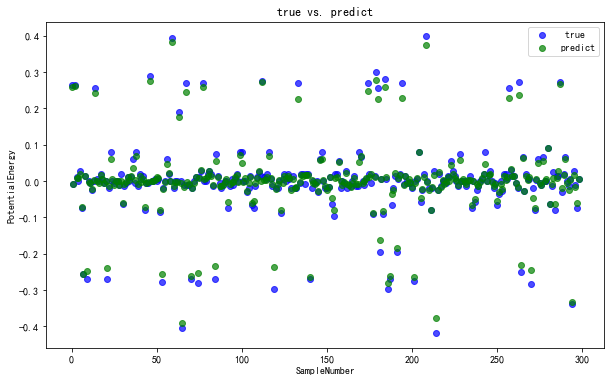

In [118]:
print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=31,max_depth=6)
xgb_model.fit(X,Y)
y_pred = xgb_model.predict(X)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(X),y_pred)))
print("平均绝对误差:",mean_absolute_error(Y, y_pred))
print("r2_score",r2_score(Y,y_pred))

plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)
plt.scatter(list(range(X.shape[0])), Y, color='blue', label=' true', alpha=0.7)
plt.scatter(list(range(X.shape[0])), y_pred, color='green', label='predict', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()




In [119]:
import shap
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


# 初始化SHAP模型
explainer = shap.Explainer(xgb_model)

shap.initjs() #初始化JS
shap_values = explainer.shap_values(X) #计算每个样本的每个特征的SHAP值

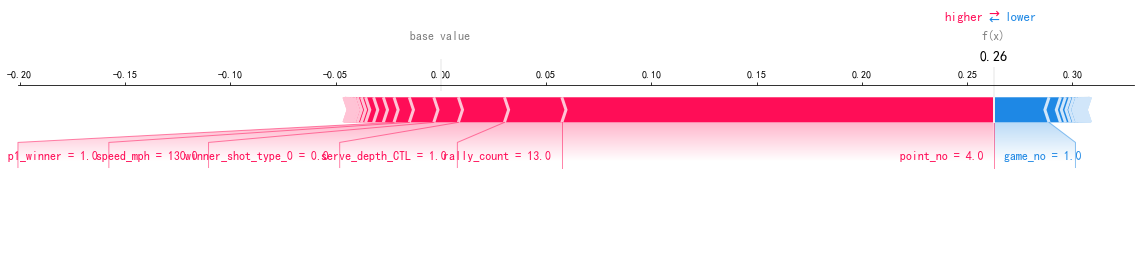

In [120]:
i=2

shap.force_plot(explainer.expected_value, shap_values[i,:], data[X.columns].iloc[i,:],matplotlib=True) #3860为样本在数据集中的索引

In [121]:
Y.iloc[i]

0.2633388452847566

In [122]:
X.iloc[i,:].values.reshape(1,-1)

array([[  0.   ,   0.   ,   1.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   1.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   1.   ,   0.   ,   0.   ,
          1.   ,   0.   ,   0.   ,   1.   ,   0.   ,   1.   ,   1.   ,
          4.   ,   0.   ,   0.   ,   0.   ,   0.   ,   1.   ,   1.   ,
          1.   ,   2.   ,   2.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          1.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          1.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,  51.108,  75.631,  13.   , 130.   ]])

In [123]:
xgb_model.predict(np.array([[  0.   ,   0.   ,   1.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   1.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   1.   ,   0.   ,   0.   ,
          1.   ,   0.   ,   0.   ,   1.   ,   0.   ,   1.   ,   1.   ,
          4.   ,   0.   ,   0.   ,   0.   ,   0.   ,   1.   ,   1.   ,
          1.   ,   2.   ,   2.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          1.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          1.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,  51.108,  75.631,  13.   , 130.   ]]))

array([0.26263344], dtype=float32)

In [124]:
cc=pd.DataFrame(data[X.columns].iloc[i,:])
cc=cc.reset_index()

for k in range(len(cc)):
    print(k,": ",cc.iloc[k,0],": ",cc.iloc[k,1])

0 :  p1_score_0 :  0.0
1 :  p1_score_1 :  0.0
2 :  p1_score_15 :  1.0
3 :  p1_score_2 :  0.0
4 :  p1_score_3 :  0.0
5 :  p1_score_30 :  0.0
6 :  p1_score_4 :  0.0
7 :  p1_score_40 :  0.0
8 :  p1_score_5 :  0.0
9 :  p1_score_6 :  0.0
10 :  p1_score_AD :  0.0
11 :  p2_score_0 :  0.0
12 :  p2_score_1 :  0.0
13 :  p2_score_15 :  0.0
14 :  p2_score_2 :  0.0
15 :  p2_score_3 :  0.0
16 :  p2_score_30 :  1.0
17 :  p2_score_4 :  0.0
18 :  p2_score_40 :  0.0
19 :  p2_score_5 :  0.0
20 :  p2_score_6 :  0.0
21 :  p2_score_7 :  0.0
22 :  p2_score_AD :  0.0
23 :  winner_shot_type_0 :  0.0
24 :  winner_shot_type_B :  0.0
25 :  winner_shot_type_F :  1.0
26 :  serve_width_B :  0.0
27 :  serve_width_BC :  0.0
28 :  serve_width_BW :  1.0
29 :  serve_width_C :  0.0
30 :  serve_width_W :  0.0
31 :  serve_depth_CTL :  1.0
32 :  serve_depth_NCTL :  0.0
33 :  set_no :  1.0
34 :  game_no :  1.0
35 :  point_no :  4.0
36 :  p1_sets :  0.0
37 :  p2_sets :  0.0
38 :  p1_games :  0.0
39 :  p2_games :  0.0
40 :  ser

根据提供的信息，以下是球员1可以单独调整的变量：


1. `p1_ace`: 表示球员1是否发出了不可阻挡的得分发球。球员1可以通过发出不可阻挡的发球来影响这个变量。

2. `p1_winner`: 表示球员1是否击出了不可阻挡的得分击球。球员1可以通过击出不可阻挡的得分击球来影响这个变量。

3. `p1_double_fault`: 表示球员1是否连续两次失误发球而输掉了分数。球员1可以通过减少双误发球来影响这个变量。

4. `p1_unf_err`: 表示球员1是否犯了非受迫性失误。球员1可以通过减少非受迫性失误来影响这个变量。

5. `p1_net_pt`: 表示球员1是否成功进入网前。球员1可以通过更频繁地进入网前来影响这个变量。

6. `p1_net_pt_won`: 表示球员1是否在进入网前时赢得了分数。球员1可以通过在网前时赢得更多分数来影响这个变量。

7. `p1_break_pt`: 表示球员1是否有机会在对手发球局中破发。球员1可以通过创建破发机会来影响这个变量。

8. `p1_break_pt_won`: 表示球员1是否成功地破发了对手的发球局。球员1可以通过破发对手来影响这个变量。

9. `p1_break_pt_missed`: 表示球员1是否错失了破发对手的机会。球员1可以通过不错失破发机会来影响这个变量。



In [125]:


# 47 :  p1_ace :  0.0

# 49 :  p1_winner :  1.0

# 51 :  p1_double_fault :  0.0

# 53 :  p1_unf_err :  0.0

# 55 :  p1_net_pt :  0.0

# 57 :  p1_net_pt_won :  0.0

# 59 :  p1_break_pt :  0.0

# 61 :  p1_break_pt_won :  0.0

# 63 :  p1_break_pt_missed :  0.0


In [126]:
# xgb_model.predict(np.array([[  0.   ,   0.   ,   1.   ,   0.   ,   0.   ,   0.   ,   0.   ,
#           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
#           0.   ,   0.   ,   1.   ,   0.   ,   0.   ,   0.   ,   0.   ,
#           0.   ,   0.   ,   0.   ,   0.   ,   1.   ,   0.   ,   0.   ,
#           1.   ,   0.   ,   0.   ,   1.   ,   0.   ,   1.   ,   1.   ,
#           4.   ,   0.   ,   0.   ,   0.   ,   0.   ,   1.   ,   1.   ,
#           1.   ,   2.   ,   2.   ,   0.   ,   0.   ,   x1  ,   0.   ,
#          x2   ,   0.   ,  x3   ,   0.   ,   x4   ,   0.   ,   x5  ,
#           1.   ,   x6  ,   0.   ,  x7  ,   0.   , x8   ,   0.   ,
#           x9  ,   0.   ,  51.108,  75.631,  13.   , 130.   ]]))

In [127]:
import numpy as np
from itertools import product

# 假设xgb_model已经定义并训练好
# xgb_model = ...

def find_best_combination(xgb_model):
    best_score = -np.inf
    best_combination = None
    
    # 遍历所有可能的组合
    for combination in product([0, 1], repeat=9):
        # 构建输入数组
        x = np.array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
                       1., 0., 0., 1., 0., 1., 1., 4., 0., 0., 0., 0., 1., 1.,
                       1., 2., 2., 0., 0., combination[0], 0., combination[1], 0., combination[2], 0., combination[3], 0., combination[4],
                       1., combination[5], 0., combination[6], 0., combination[7], 0.,
                       combination[8], 0., 51.108, 75.631, 13., 130.]])
        
        # 进行预测
        score = xgb_model.predict(x)[0]
        
        # 更新最优解
        if score > best_score:
            best_score = score
            best_combination = combination
    
    return best_combination, best_score

# 调用函数
best_combination, best_score = find_best_combination(xgb_model)
print("Best combination:", best_combination)
print("Best score:", best_score)


Best combination: (0, 1, 0, 1, 0, 0, 0, 0, 0)
Best score: 0.29930353


In [128]:
import numpy as np
import random

# 假设xgb_model已经定义并训练好
# xgb_model = ...

def initialize_population(population_size, num_genes):
    population = []
    for _ in range(population_size):
        individual = [random.choice([0, 1]) for _ in range(num_genes)]
        population.append(individual)
    return population

def calculate_fitness(individual, xgb_model):
    # 构建输入数组
    x = np.array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
                   1., 0., 0., 1., 0., 1., 1., 4., 0., 0., 0., 0., 1., 1.,
                   1., 2., 2., 0., 0., individual[0], 0., individual[1], 0., individual[2], 0., individual[3], 0., individual[4],
                   1., individual[5], 0., individual[6], 0., individual[7], 0.,
                   individual[8], 0., 51.108, 75.631, 13., 130.]])
    
    # 进行预测
    score = xgb_model.predict(x)[0]
    return score

def select_parents(population, num_parents, xgb_model):
    fitness_scores = [calculate_fitness(individual, xgb_model) for individual in population]
    selected_indices = np.argsort(fitness_scores)[-num_parents:]
    selected_parents = [population[i] for i in selected_indices]
    return selected_parents

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

def genetic_algorithm(xgb_model, population_size, num_generations, mutation_rate):
    num_genes = 9
    population = initialize_population(population_size, num_genes)
    
    for generation in range(num_generations):
        parents = select_parents(population, population_size // 2, xgb_model)
        new_population = parents.copy()
        
        while len(new_population) < population_size:
            parent1, parent2 = random.choices(parents, k=2)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])
        
        population = new_population
    
    best_individual = max(population, key=lambda x: calculate_fitness(x, xgb_model))
    best_score = calculate_fitness(best_individual, xgb_model)
    
    return best_individual, best_score

# 调用遗传算法函数
best_combination, best_score = genetic_algorithm(xgb_model, population_size=100, num_generations=50, mutation_rate=0.01)
print("Best combination:", best_combination)
print("Best score:", best_score)


Best combination: [0, 1, 0, 1, 0, 1, 1, 0, 0]
Best score: 0.29930353


In [135]:
kkk=[]
for  k in range(len(X)):
    print(k,"/",len(X))
    aaa=X.iloc[k,:].values.reshape(1,-1)
    def find_best_combination(xgb_model):
        best_score = -np.inf
        best_combination = None

        # 遍历所有可能的组合
        for combination in product([0, 1], repeat=9):
            # 构建输入数组
            x = np.array([[aaa[0][0], aaa[0][1], aaa[0][2], aaa[0][3], aaa[0][4], aaa[0][5], aaa[0][6], aaa[0][7], aaa[0][8], aaa[0][9], aaa[0][10], aaa[0][11], aaa[0][12], aaa[0][13],
                           aaa[0][14], aaa[0][15], aaa[0][16], aaa[0][17],aaa[0][18], aaa[0][19], aaa[0][20], aaa[0][21], aaa[0][22], aaa[0][23], aaa[0][24], aaa[0][25], aaa[0][26], aaa[0][27],
                           aaa[0][28], aaa[0][29], aaa[0][30], aaa[0][31], aaa[0][32], aaa[0][33], aaa[0][34], aaa[0][35], aaa[0][36], aaa[0][37], aaa[0][38], aaa[0][39], aaa[0][40], aaa[0][41],
                           aaa[0][42], aaa[0][43], aaa[0][44], aaa[0][45], aaa[0][46], combination[0], aaa[0][48], combination[1], aaa[0][50], combination[2], aaa[0][52], combination[3], aaa[0][54], combination[4],
                           aaa[0][56], combination[5], aaa[0][58], combination[6], aaa[0][60], combination[7], aaa[0][62],
                           combination[8], aaa[0][64], aaa[0][65], aaa[0][66], aaa[0][67], aaa[0][68]]])

            # 进行预测
            score = xgb_model.predict(x)[0]

            # 更新最优解
            if score > best_score:
                best_score = score
                best_combination = combination

        return best_combination, best_score

    # 调用函数
    best_combination, best_score = find_best_combination(xgb_model)
#     print("Best combination:", best_combination)
#     print("Best score:", best_score)
    kkk.append([Y.iloc[k],best_score,best_combination[0],best_combination[1],best_combination[2],best_combination[3],best_combination[4],best_combination[5],best_combination[6],best_combination[7],best_combination[8]])
    

0 / 299
1 / 299
2 / 299
3 / 299
4 / 299
5 / 299
6 / 299
7 / 299
8 / 299
9 / 299
10 / 299
11 / 299
12 / 299
13 / 299
14 / 299
15 / 299
16 / 299
17 / 299
18 / 299
19 / 299
20 / 299
21 / 299
22 / 299
23 / 299
24 / 299
25 / 299
26 / 299
27 / 299
28 / 299
29 / 299
30 / 299
31 / 299
32 / 299
33 / 299
34 / 299
35 / 299
36 / 299
37 / 299
38 / 299
39 / 299
40 / 299
41 / 299
42 / 299
43 / 299
44 / 299
45 / 299
46 / 299
47 / 299
48 / 299
49 / 299
50 / 299
51 / 299
52 / 299
53 / 299
54 / 299
55 / 299
56 / 299
57 / 299
58 / 299
59 / 299
60 / 299
61 / 299
62 / 299
63 / 299
64 / 299
65 / 299
66 / 299
67 / 299
68 / 299
69 / 299
70 / 299
71 / 299
72 / 299
73 / 299
74 / 299
75 / 299
76 / 299
77 / 299
78 / 299
79 / 299
80 / 299
81 / 299
82 / 299
83 / 299
84 / 299
85 / 299
86 / 299
87 / 299
88 / 299
89 / 299
90 / 299
91 / 299
92 / 299
93 / 299
94 / 299
95 / 299
96 / 299
97 / 299
98 / 299
99 / 299
100 / 299
101 / 299
102 / 299
103 / 299
104 / 299
105 / 299
106 / 299
107 / 299
108 / 299
109 / 299
110 / 299


In [130]:
rrr=pd.DataFrame(kkk,columns=['真实值','预测值','p1_ace','p1_winner','p1_double_fault','p1_unf_err','p1_net_pt','p1_net_pt_won','p1_break_pt','p1_break_pt_won','p1_break_pt_missed'])
rrr

,真实值,预测值,p1_ace,p1_winner,p1_double_fault,p1_unf_err,p1_net_pt,p1_net_pt_won,p1_break_pt,p1_break_pt_won,p1_break_pt_missed
0,0.263339,0.272943,0,0,1,0,0,0,1,0,1
1,-0.006755,0.007962,0,1,0,0,0,0,0,0,0
2,0.263339,0.299304,0,1,0,1,0,0,0,0,0
3,0.010326,0.015363,1,1,0,0,0,0,1,0,0
4,0.000000,0.019855,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,-0.339338,-0.100227,0,1,0,0,0,0,1,0,0
295,0.029077,0.018781,0,0,1,1,0,0,0,0,0
296,-0.011996,0.016919,0,1,0,1,0,0,1,0,0
297,-0.073872,-0.059393,0,0,0,1,0,0,0,0,0


In [131]:
data[['p1_ace','p1_winner','p1_double_fault','p1_unf_err','p1_net_pt','p1_net_pt_won','p1_break_pt','p1_break_pt_won','p1_break_pt_missed']]

,p1_ace,p1_winner,p1_double_fault,p1_unf_err,p1_net_pt,p1_net_pt_won,p1_break_pt,p1_break_pt_won,p1_break_pt_missed
0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,1,0,0,0,0
295,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0


In [132]:
rrr.describe()

,真实值,预测值,p1_ace,p1_winner,p1_double_fault,p1_unf_err,p1_net_pt,p1_net_pt_won,p1_break_pt,p1_break_pt_won,p1_break_pt_missed
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.0,299.000000,299.0,299.000000
mean,-0.000075,0.024695,0.026756,0.571906,0.187291,0.755853,0.224080,0.0,0.578595,0.0,0.137124
std,0.106791,0.087351,0.161640,0.495632,0.390799,0.430301,0.417674,0.0,0.494612,0.0,0.344555
min,-0.418083,-0.308049,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,-0.015903,0.001863,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,0.018886,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
75%,0.018751,0.037932,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
max,0.398186,0.385016,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


In [134]:
rrr.to_csv("Q3.csv",index=None)